<a href="https://colab.research.google.com/github/amga-d/Emotion-Recognition-ML/blob/main/Emotion_Recognition_from_Face_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Information
Student Name: Amgad

Student IDs: 23523242

Dataset Source: https://www.kaggle.com/datasets/deadskull7/fer2013


# Import libraries


In [ ]:
import pandas as pd # Data Manipultation and Analysis
import numpy as np  # To Support numerical operations (arraies && matrices)
import matplotlib.pyplot as plt# To create visualizations and plots
from sklearn.model_selection import train_test_split, cross_val_score# Uesed to split the data into train and test sets for machine learning models.
from sklearn.decomposition import PCA # This is the principal component analysis which is used for dimensionality reducation.
from sklearn.svm import SVC # this the machine learning classifier (Support Vector Machine class)
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay,confusion_matrix
import kagglehub # to download the dataset from kagglehub

# Load Dataset

In [ ]:
# Load the FER2013 dataset (CSV format)
path = kagglehub.dataset_download("deadskull7/fer2013")
data = pd.read_csv(path+'/fer2013.csv')



# Data Acquisition

In [ ]:
# Extract pixel data and labels
pixels = data['pixels'].apply(lambda x: np.fromstring(x, sep=' '))  # Convert pixel strings to arrays
X = np.vstack(pixels.values)  # Convert to 2D array
y = data['emotion'].values  # Emotion labels

# Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_labels = {
    0: 'Angry', 1: 'Disgust', 2: 'Fear',
    3: 'Happy', 4: 'Sad', 5: 'Surprise',
    6: 'Neutral'
}

# Data Visualizing

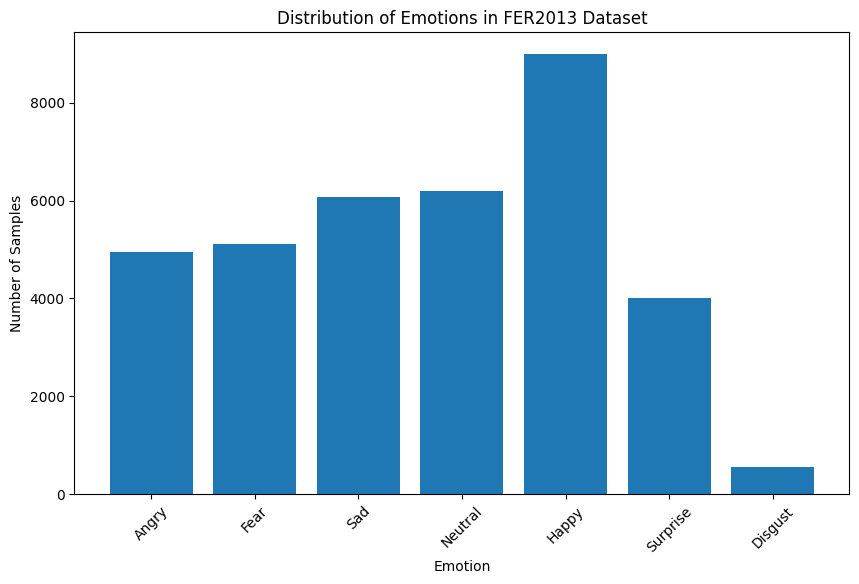

In [ ]:
# Data Distribution Visualization
emotion_num = data['emotion'].value_counts(sort=False).reset_index()
emotion_num.columns = ['emotion', 'number']
emotion_num['emotion'] = emotion_num['emotion'].map(emotion_labels)

# Plotting the Distribution of Emotions
plt.figure(figsize=(10, 6))
plt.bar(emotion_num['emotion'], emotion_num['number'])
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.title("Distribution of Emotions in FER2013 Dataset")
plt.xticks(rotation=45)
plt.show()

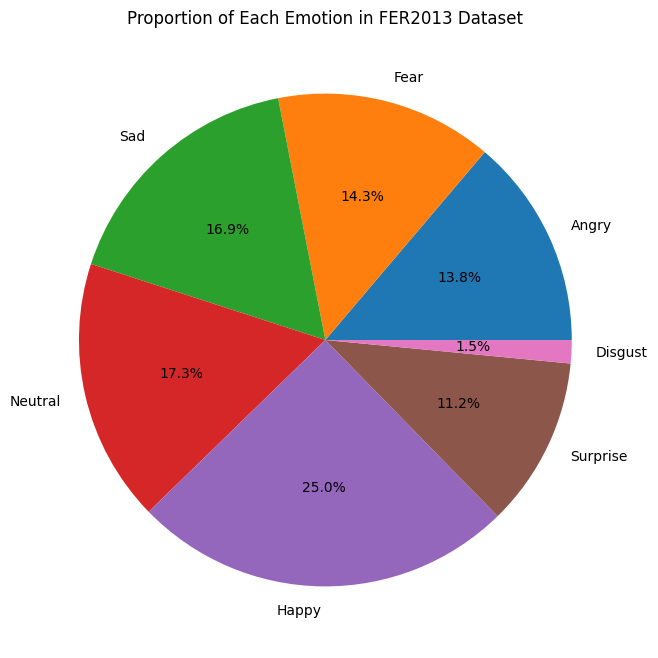

In [ ]:
# Pie Chart for Class Proportions
plt.figure(figsize=(8, 8))
plt.pie(emotion_num['number'], labels=emotion_num['emotion'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title("Proportion of Each Emotion in FER2013 Dataset")
plt.show()

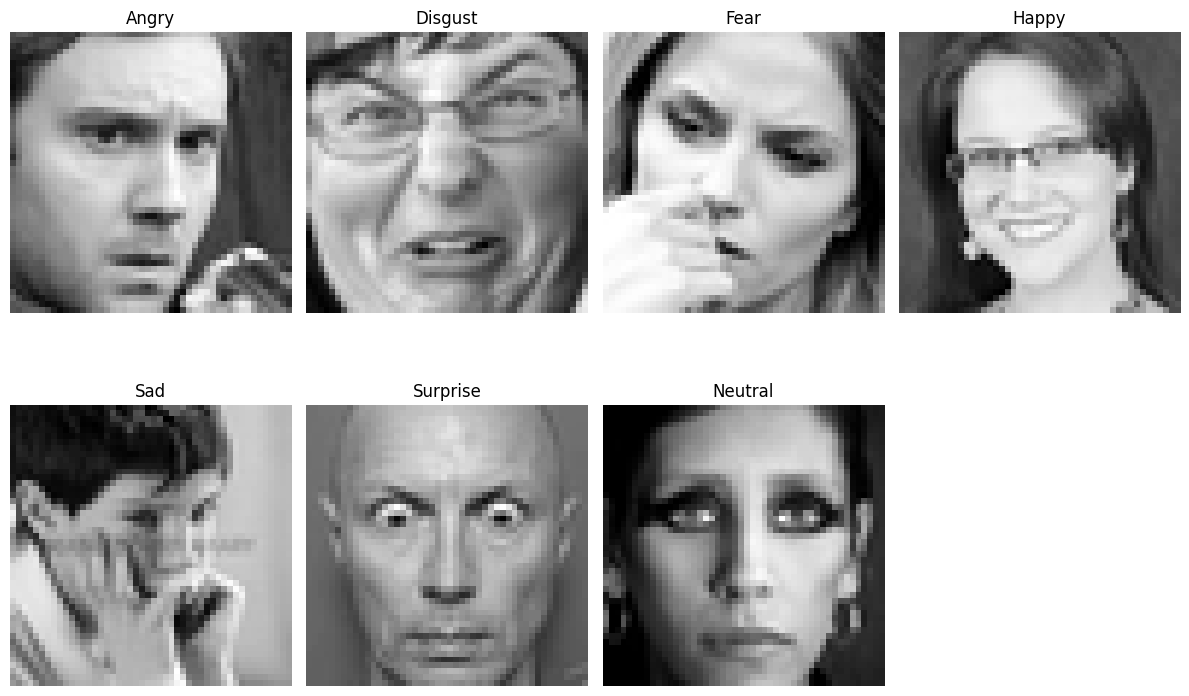

In [ ]:
# Display One Image per Emotion
plt.figure(figsize=(12, 8))
for emotion, label in emotion_labels.items():
    img_index = np.where(y == emotion)[0][0]  # Find the first occurrence of the emotion
    img = X[img_index].reshape(48, 48)
    plt.subplot(2, 4, emotion + 1)  # Adjust subplot layout
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Pre-processing:

In [ ]:
# Normalizing X
X = X / 255.0

# X after normalization
np.min(X), np.max(X)

(0.0, 1.0)

# Train-Test Split:

In [ ]:
# Custom train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (28709, 2304), Test set size: (7178, 2304)


# PCA

In [ ]:
# Apply PCA
n_components = 100  # Adjust this value based on desired explained variance
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original shape: {X_train.shape}, Reduced shape: {X_train_pca.shape}")

# Explained variance ratio
explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"PCA explained variance: {explained_variance:.2f}%")


Original shape: (28709, 2304), Reduced shape: (28709, 100)
PCA explained variance: 89.80%


In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Define the parameter grid with different kernels
# param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# # Create an SVM classifier
# svmClassifier = svm.SVC()

# # Create GridSearchCV object
# grid_search = GridSearchCV(svmClassifier, param_grid, cv=5)

# # Fit the grid search to your training data
# grid_search.fit(x_train_pca, y_train)

# # Print the best kernel
# print("Best kernel:", grid_search.best_params_['kernel'])

# svmClassifier.fit(x_train_pca, y_train.ravel())
# y_pred = svmClassifier.predict(x_test_pca)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

# Model Training

In [ ]:
# Perform 5-fold cross-validation
svm = SVC(kernel='rbf', C=1, random_state=42 ,class_weight='balanced')
scores = cross_val_score(svm, X_train_pca, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.41065831 0.41727621 0.42093347 0.42023685 0.41020728]
Mean accuracy: 0.41586242449602795


In [ ]:
# Train a Support Vector Machine (SVM)
svm = SVC(kernel='rbf', C=1, random_state=42 ,class_weight='balanced')
svm.fit(X_train_pca, y_train)

SVC(C=1, class_weight='balanced', random_state=42)

# Model Evaluation

In [ ]:
# Make predictions
y_pred = svm.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = svm.score(X_train_pca, y_train)
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=list(emotion_labels.values())))
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.31      0.32       974
           1       0.22      0.57      0.32       100
           2       0.32      0.26      0.29      1003
           3       0.62      0.57      0.59      1858
           4       0.35      0.39      0.37      1208
           5       0.49      0.60      0.54       775
           6       0.41      0.40      0.41      1260

    accuracy                           0.43      7178
   macro avg       0.39      0.44      0.41      7178
weighted avg       0.44      0.43      0.43      7178

Training Accuracy: 0.56
Testing Accuracy: 0.43


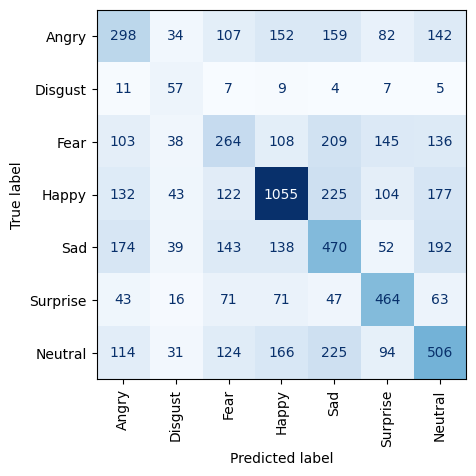

In [ ]:
# Display Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=list(emotion_labels.values()))
display.plot(cmap='Blues' , colorbar= False , xticks_rotation=90)